# Bank Loan Modelling
#### **Data Science Course - Assignment 1** <br><br>

*Mohammad Hossein Malekpour | 9613425<br>
mohmmadhossein.malkepour@gmail.com*<br><br>

The beginning of each cell is commented why I am doing that part.<br>
After each part I explained with a red arrow what I understood from that part.<br>
<br>
________________________________________

# 1. Import Necessary Modules

In [1]:
# !pip install pandas-profiling
# !pip install xgboost

In [2]:
# Load packages
import sys
import pandas as pd
import matplotlib 
import numpy as np 
import scipy as sp 
import sklearn 
from pandas_profiling import ProfileReport

# Misc libraries
import random
import time

# Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix ,classification_report

# Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure Visualization Defaults
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
%config InlineBackend.figure_format='retina'

import warnings 
warnings.filterwarnings('ignore')

# 2. Load and Read Data

In [3]:
# Loading data into Pandas

data_raw = pd.read_csv('data.csv')
data = data_raw.copy()

In [4]:
# Preview Data

data_raw.sample(10)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
992   2817   50          26     128     92780       2    0.4          1   
2741  1280   48          22      84     90024       2    0.4          3   
910   3514   31           4      39     94501       2    1.0          2   
2937  4095   53          23       8     95616       4    0.4          3   
3686  3450   57          32     135     90095       3    4.8          2   
556   2102   35           5     203     95032       1   10.0          3   
2830  3700   46          22      83     94501       4    1.4          2   
4115  2977   33           8      82     95747       1    2.6          2   
2624  4645   58          34      22     94608       1    0.1          2   
988   3571   54          29      32     91107       2    0.6          3   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
992          0              0                   0           0       1   
2741       145              0                   0           0       0   
910          0              0                   0           0       0   
2937         0              0                   1           0       1   
3686         0              1                   1           1       1   
556          0              1                   0           0       0   
2830         0              0                   0           0       1   
4115         0              0                   1           1       1   
2624         0              0                   0           0       1   
988          0              0                   0           0       1   

      CreditCard  
992            0  
2741           0  
910            0  
2937           0  
3686           0  
556            0  
2830           1  
4115           1  
2624           0  
988            1

# 3. Exploratory Data Analysis

In [5]:
# Generates HTML profile reports from a pandas DataFrame (path: ./raw_data_report.html)

profile = ProfileReport(data, title='Bank Loan Modeling', explorative=True)
profile

In [6]:
# Print a concise summary of a DataFrame

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4500 non-null   int64  
 1   Age                 4500 non-null   int64  
 2   Experience          4500 non-null   int64  
 3   Income              4500 non-null   int64  
 4   ZIP Code            4500 non-null   int64  
 5   Family              4500 non-null   int64  
 6   CCAvg               4500 non-null   float64
 7   Education           4500 non-null   int64  
 8   Mortgage            4500 non-null   int64  
 9   Personal Loan       4500 non-null   int64  
 10  Securities Account  4500 non-null   int64  
 11  CD Account          4500 non-null   int64  
 12  Online              4500 non-null   int64  
 13  CreditCard          4500 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 492.3 KB


 #### <font color='red'>🠊 We don't have any missing value.</font> <br><br>

In [7]:
# Check target value

data['Personal Loan'].value_counts()

0    4072
1     428
Name: Personal Loan, dtype: int64

#### <font color='red'>🠊 Dataset is skewed (imbalanced).</font> <br><br>

In [8]:
# Generate descriptive statistics

data.describe().T

count          mean          std      min       25%  \
ID                  4500.0   2509.383333  1443.917459      1.0   1257.75   
Age                 4500.0     45.330667    11.478828     23.0     35.00   
Experience          4500.0     20.109333    11.483496     -3.0     10.00   
Income              4500.0     73.709778    46.061299      8.0     39.00   
ZIP Code            4500.0  93169.384444  1758.566077  90005.0  91950.00   
Family              4500.0      2.402444     1.145764      1.0      1.00   
CCAvg               4500.0      1.939869     1.752351      0.0      0.70   
Education           4500.0      1.882000     0.840509      1.0      1.00   
Mortgage            4500.0     56.579556   101.451763      0.0      0.00   
Personal Loan       4500.0      0.095111     0.293401      0.0      0.00   
Securities Account  4500.0      0.104667     0.306157      0.0      0.00   
CD Account          4500.0      0.060222     0.237925      0.0      0.00   
Online              4500.0      0.595333     0.490882      0.0      0.00   
CreditCard          4500.0      0.296222     0.456641      0.0      0.00   

                        50%       75%      max  
ID                   2511.5   3770.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 63.0     99.00    224.0  
ZIP Code            93448.5  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

#### <font color='red'>🠊 Column 'Experience' has negative values</font> <br><br>

In [9]:
# Count 'Experience' negative values

data[data['Experience'] < 0].Experience.count()

48

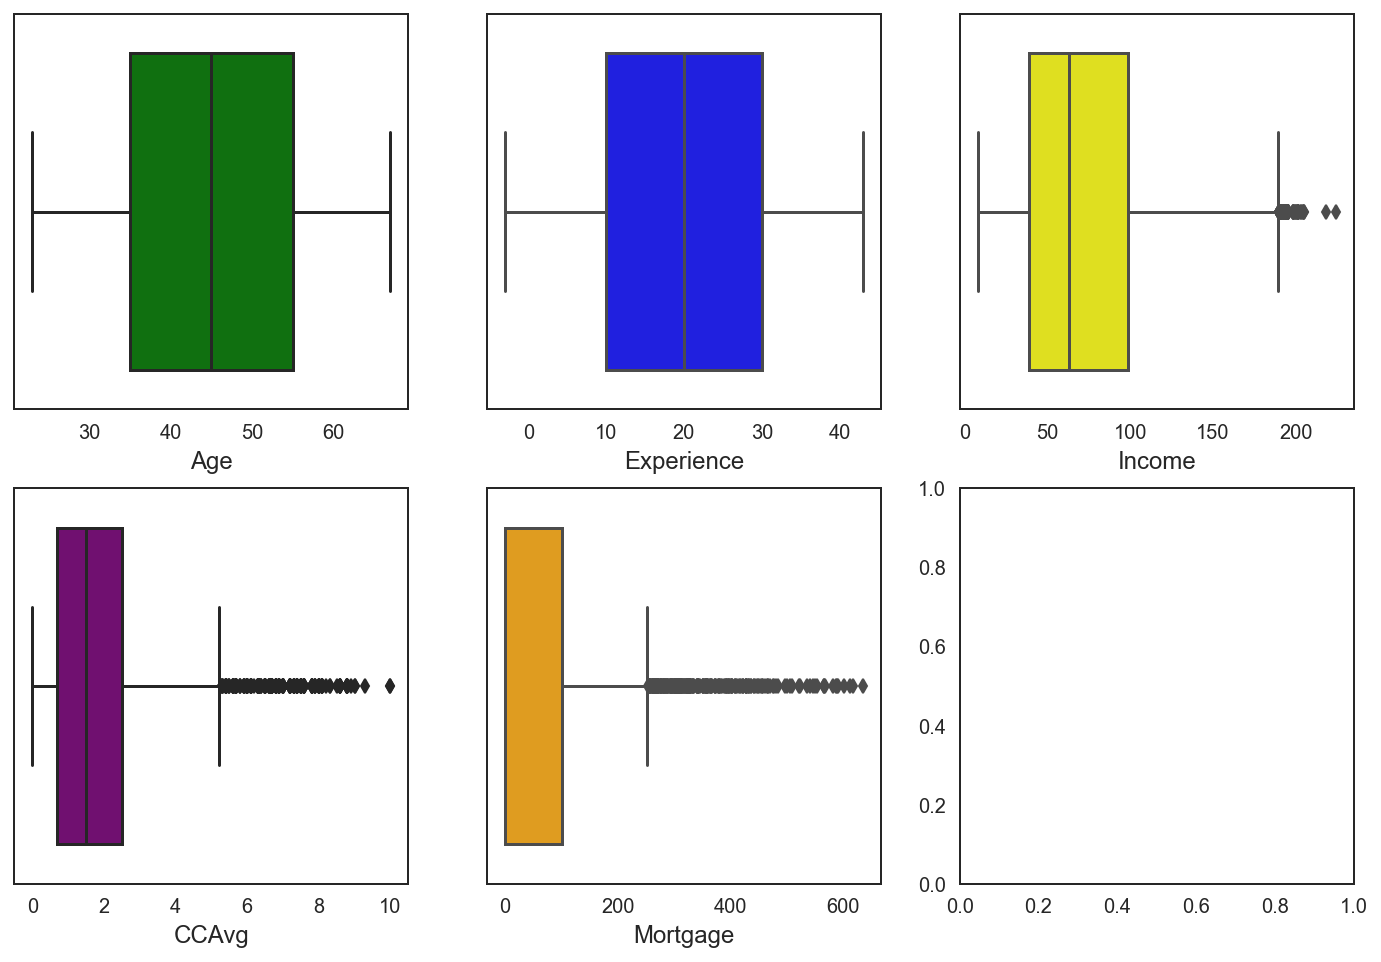

In [10]:
# Draw a box plot to show distributions of the continuous variables.

fig, ax = plt.subplots(2,3)
continuous_vars = ['Age','Experience','Income','CCAvg','Mortgage']
colors = ['green', 'blue', 'yellow', 'purple', 'orange']
i = 0
for var, c in zip(continuous_vars, colors):
    sns.boxplot(x=var, data=data, color=c, ax=ax[i//3,i%3])
    i += 1

#### <font color='red'>🠊 Age and Experience feature is normally distributed. </font>
<font color='red'>(Age: majority between 35 and 55 years)<br>
(Experience: majority between 10 to 30 years)</font>

#### <font color='red'>🠊 Most peaple have a mortgage of less than 40K and the max value is 635K. </font>
#### <font color='red'>🠊There are lots of outliers in the monthly income, CCAvg and Mortagage. </font>

 <br><br>

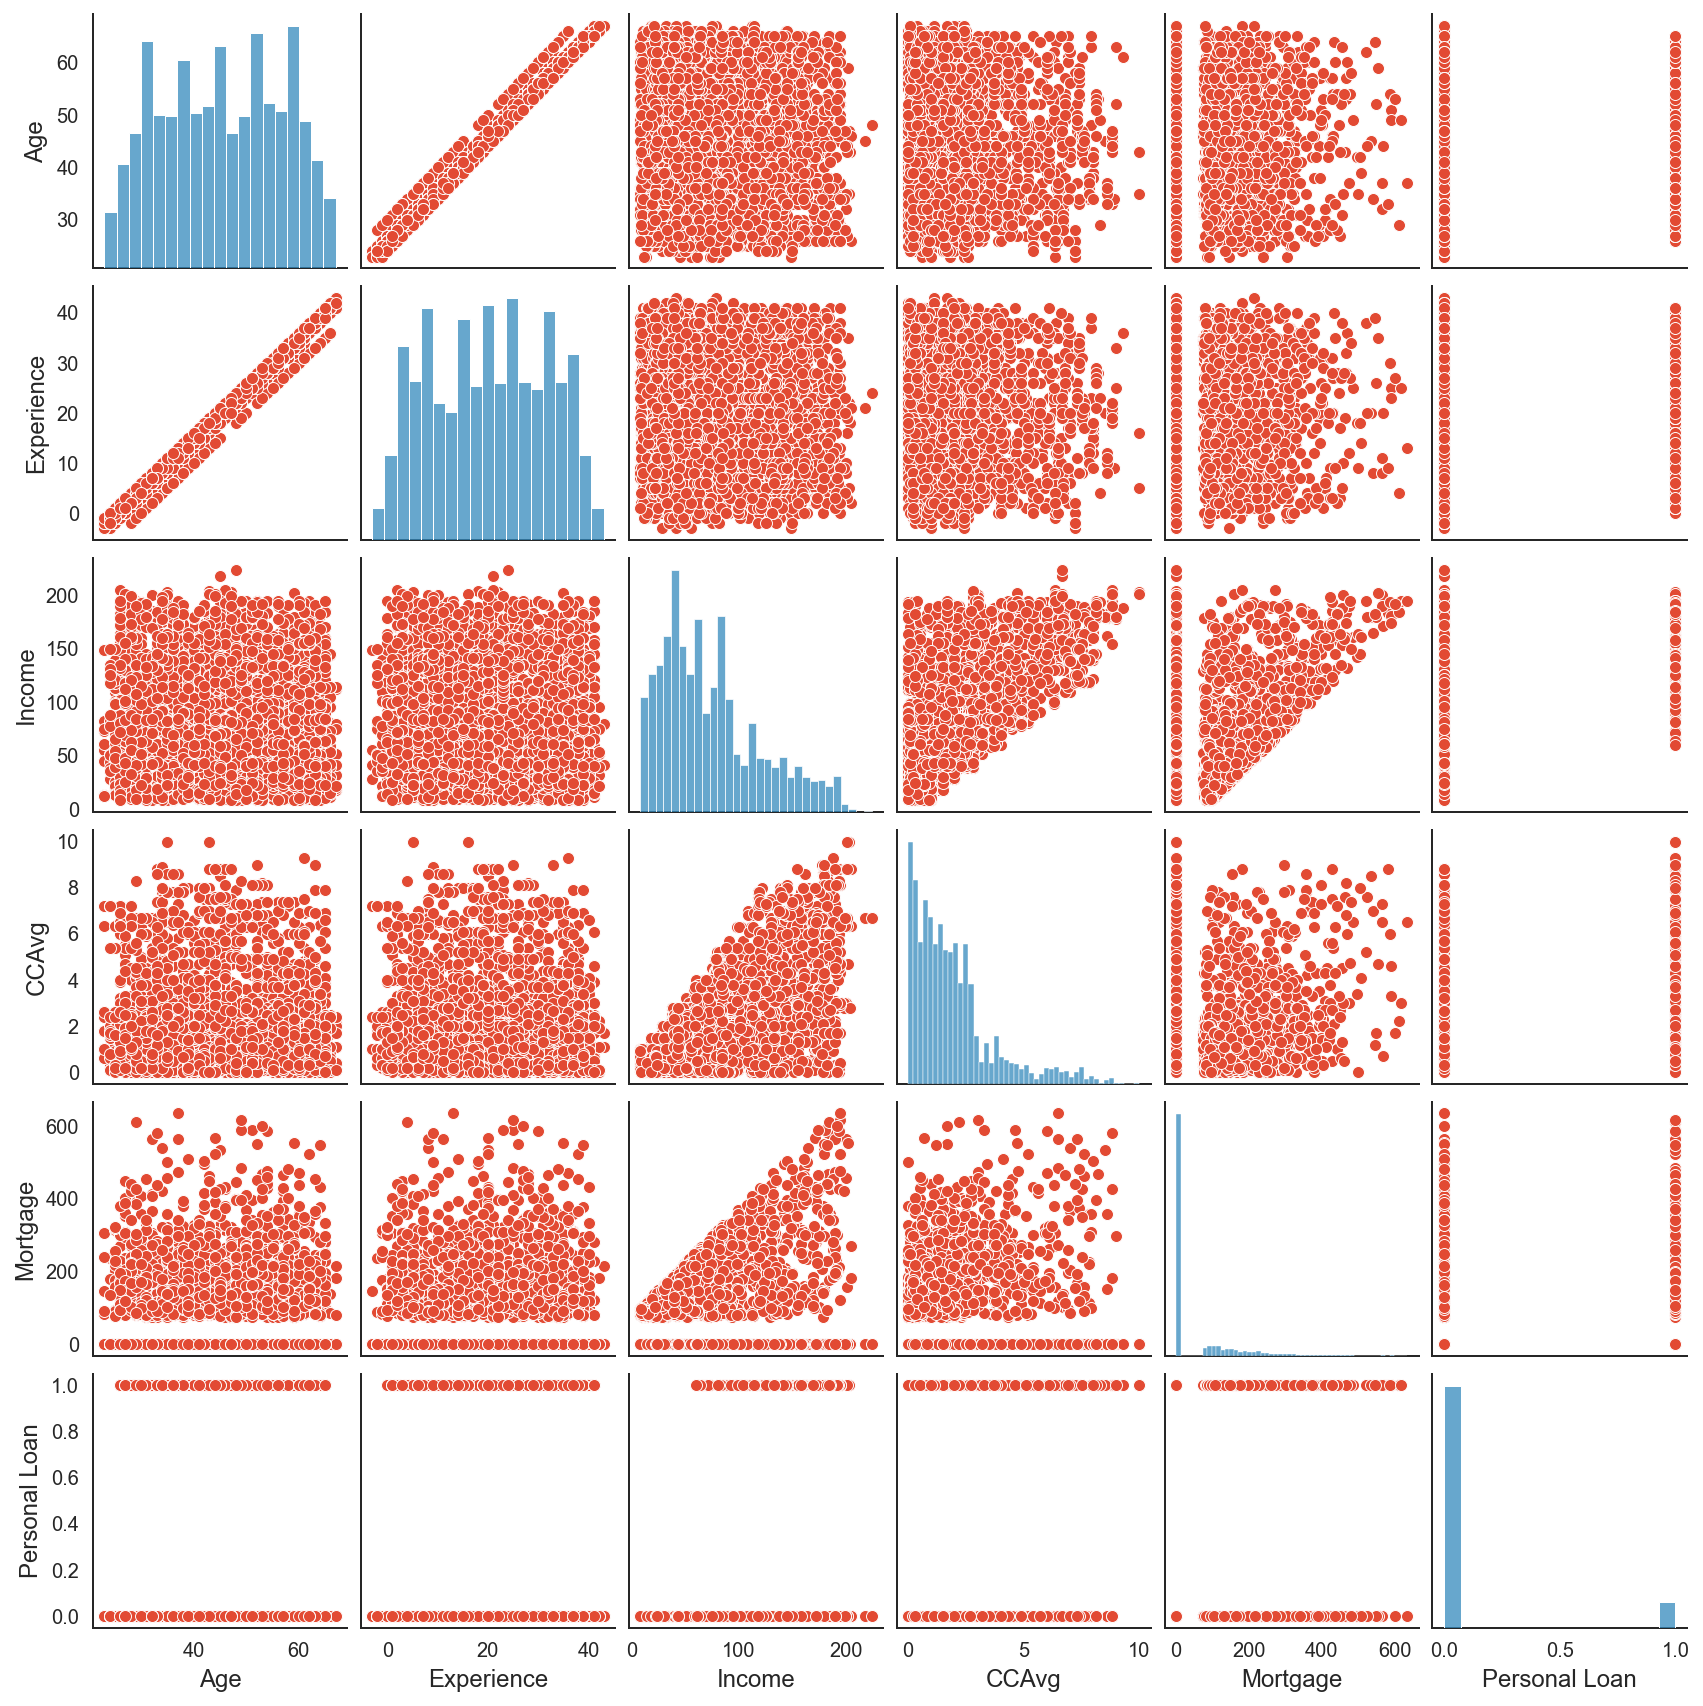

In [11]:
# Plot pairwise relationships in a dataset

tmp = data[['Age','Experience','Income','CCAvg', 'Mortgage', 'Personal Loan']]
sns.pairplot(data=tmp, height=2)

 #### <font color='red'>🠊 Income, CCAverage and Mortgage are skewed. we will use log transform to remove skewness from the predictor.
 #### <font color='red'>🠊 Age is highly correlated with Experience. so we will drop one of them.</font> 
 <br><br>

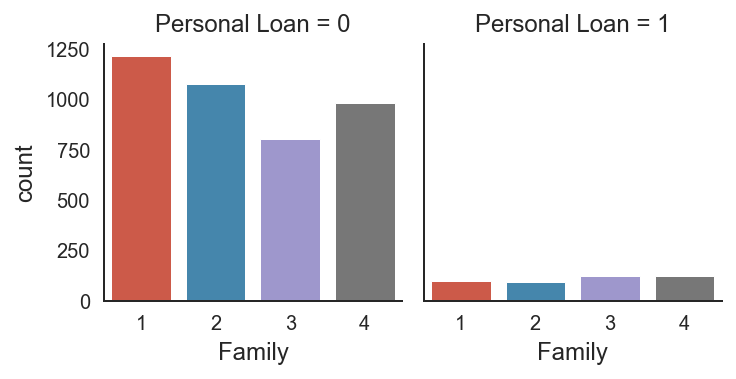

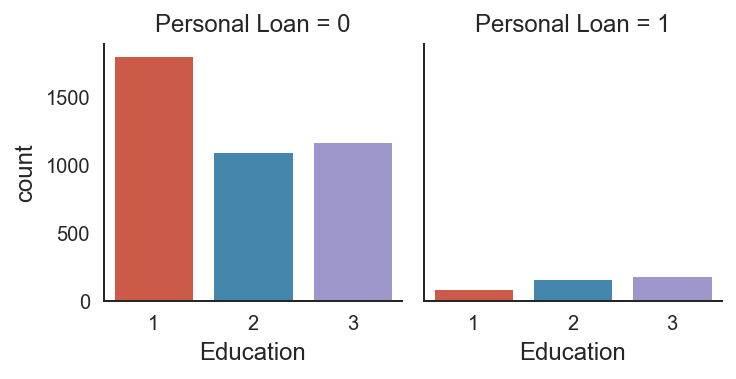

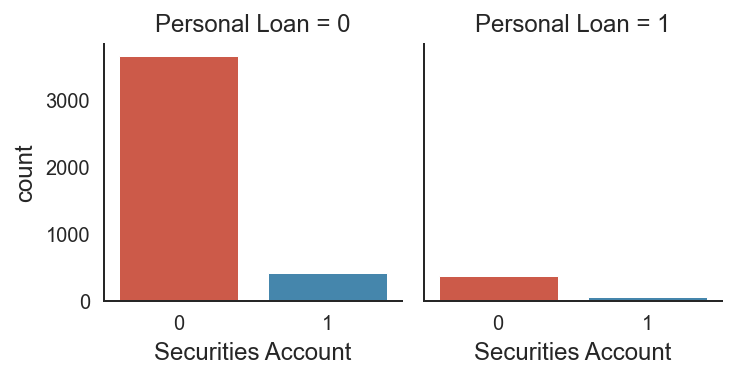

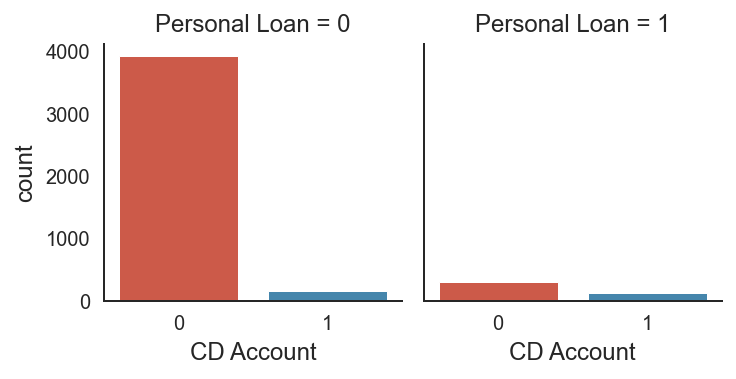

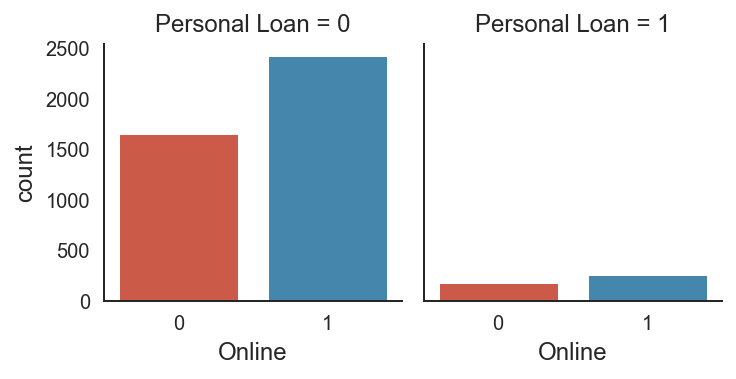

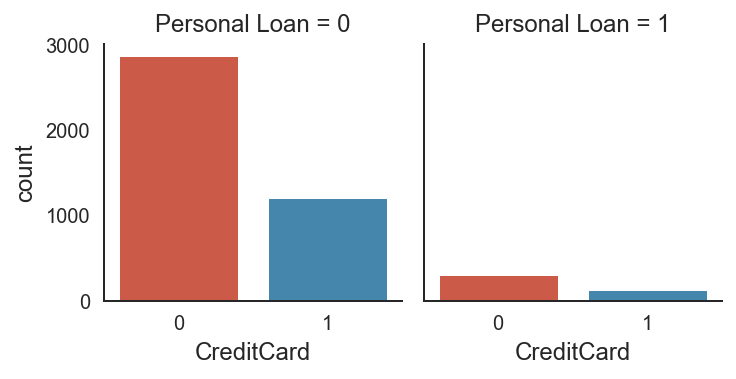

In [12]:
# Show the counts of target 'Personal Loan' in each categorical bin using bars.

categorical_vars = ['Family','Education','Securities Account','CD Account','Online','CreditCard']
for var in categorical_vars:
    sns.catplot(x=var, col='Personal Loan', kind='count', data=data, height=2.5)

 #### <font color='red'>🠊 Families (n>=2), people who use online services, clients who have securities<br> accounts and people who are not students are more likely to use **personal loans**.</font> <br><br>

In [13]:
#plot distributions of age of passengers who survived or did not survive

a = sns.FacetGrid(data, hue = 'Personal Loan', aspect=4)
a.map(sns.kdeplot, 'CCAvg', shade= True )
a.set(xlim=(0 , data['CCAvg'].max()))
a.add_legend()

#### <font color='red'>🠊 persons who have personal loan have a higher credit card average. <br><br>

In [14]:
# correlation heatmap show which variables are correlated, to what degree, in which direction, and alerts us to potential multicollinearity problems.

mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt=".3f", vmin=-1, vmax=1, linewidth = 1, center=0, mask=mask, cmap='RdBu_r')

<AxesSubplot:>

#### <font color='red'>🠊 Income and CCAverage has some correlation with Personal Loan.</font>
#### <font color='red'> 🠊 As mentioned before Age and Experience is highly correlated. And the rest of the relations are clear in the graph!</font> <br><br>


In [15]:
# Check 'ZIP Code' column

data['ZIP Code'].value_counts()

94720    146
94305    113
95616    104
90095     64
93106     53
        ... 
96145      1
90016      1
91024      1
90068      1
94965      1
Name: ZIP Code, Length: 463, dtype: int64

In [16]:
data['ZIP Code'] = data['ZIP Code'].astype(str)
data['ZIP Code'].str[0:2].value_counts()

94    1327
92     895
95     736
90     640
91     490
93     379
96      33
Name: ZIP Code, dtype: int64

#### <font color='red'>🠊 It's categorical data (in numerical appearance) and most of category hasn't enough sample! We will separate with the first two digits to minimize categories.

# 4. Data Wrangling and Cleaning 

### 4.1 Correcting:

In [17]:
# Drop negetive values of 'Experience'

data[data['Experience'] < 0].Experience.count()
data.drop(data[data['Experience'] < 0].index, inplace=True)

In [18]:
# Drop 'ID' and 'Age' columns (Age and Experience are highly correlated)

data.drop('Age', axis=1, inplace=True)
data.drop('ID', axis=1, inplace=True)

In [19]:
# Log transformation to remove skewness from 'Income'

data['Income'] = np.log2(data['Income'])
sns.displot(data, x="Income", height=2.5)

### 4.2 Create: Feature Engineering

In [20]:
# Discrete variables
data['IsAlone'] = 1
data['IsAlone'].loc[data['Family'] > 1] = 0 # now update to no/0 if family size is greater than 1


# Age Bins using cut bins
data['Experience'] = pd.cut(data['Experience'].astype(int), 5)
label = LabelEncoder()
data['Experience'] = label.fit_transform(data['Experience'])


# separate 'ZIP Code' with the first two digits to minimize categories
data['ZIP Code'] = data['ZIP Code'].str[0:2]

### 4.3 Covert Format

In [21]:
# Code categorical data

label = LabelEncoder()
data['Experience'] = label.fit_transform(data['Experience'])
data['ZIP Code'] = label.fit_transform(data['ZIP Code'])

In [22]:
# Convert categorical variable into dummy/indicator variables

zip_dummies = pd.get_dummies(data['ZIP Code'], prefix='zip')
data.drop('ZIP Code', axis=1, inplace=True)
data = pd.concat([data, zip_dummies], axis=1)

In [23]:
# Preview Data

data.sample(5)

Experience    Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
4433           2  6.375039       2    3.8          3         0              0   
1518           0  5.321928       3    0.1          2       111              0   
1828           2  6.807355       1    0.3          1       229              0   
1974           3  6.918863       2    1.1          3         0              1   
1578           3  4.459432       2    0.4          1         0              0   

      Securities Account  CD Account  Online  CreditCard  IsAlone  zip_0  \
4433                   1           0       0           1        0      0   
1518                   0           0       1           0        0      0   
1828                   0           0       0           0        1      0   
1974                   1           0       0           0        0      0   
1578                   0           0       1           0        0      0   

      zip_1  zip_2  zip_3  zip_4  zip_5  zip_6  
4433      0      0      0      0      1      0  
1518      0      0      0      1      0      0  
1828      0      0      0      1      0      0  
1974      0      0      0      0      1      0  
1578      0      0      1      0      0      0

# 5. Model Data

In [24]:
# Specify Target and Predictor columns

target = ['Personal Loan']
predictors = ['Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard','IsAlone','zip_0','zip_1','zip_2','zip_3','zip_4','zip_5','zip_6']

In [25]:
# Machine Learning Algorithm (MLA) Selection and Initialization

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(), 
    ensemble.BaggingClassifier(), 
    ensemble.ExtraTreesClassifier(), 
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(), 
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(), #Good for discrete data
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    #xgboost
    XGBClassifier()
    ]

In [26]:
# Split dataset in cross-validation with this splitter class
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

# Create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

# Create table to compare MLA predictions
MLA_predict = data[target]

# Index through MLA and save performance to table
row_index = 0
for alg in MLA:

    # Set name and parameters
    MLA_name = alg.__class__.__name__
    print(MLA_name)
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    # Score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data[predictors], data[target], cv = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    # If this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    # Save MLA predictions
    alg.fit(data[predictors], data[target])
    MLA_predict[MLA_name] = alg.predict(data[predictors])
    
    row_index+=1

    
# Print and sort table
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

AdaBoostClassifier
BaggingClassifier
ExtraTreesClassifier
GradientBoostingClassifier
RandomForestClassifier
GaussianProcessClassifier
LogisticRegressionCV
PassiveAggressiveClassifier
RidgeClassifierCV
SGDClassifier
Perceptron
BernoulliNB
GaussianNB
KNeighborsClassifier
SVC
LinearSVC
DecisionTreeClassifier
ExtraTreeClassifier
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis
XGBClassifier
[21:26:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore 

MLA Name  \
20                  XGBClassifier   
3      GradientBoostingClassifier   
4          RandomForestClassifier   
1               BaggingClassifier   
16         DecisionTreeClassifier   
2            ExtraTreesClassifier   
0              AdaBoostClassifier   
6            LogisticRegressionCV   
15                      LinearSVC   
17            ExtraTreeClassifier   
13           KNeighborsClassifier   
5       GaussianProcessClassifier   
18     LinearDiscriminantAnalysis   
8               RidgeClassifierCV   
7     PassiveAggressiveClassifier   
14                            SVC   
9                   SGDClassifier   
19  QuadraticDiscriminantAnalysis   
11                    BernoulliNB   
12                     GaussianNB   
10                     Perceptron   

                                       MLA Parameters MLA Train Accuracy Mean  \
20  {'objective': 'binary:logistic', 'use_label_en...                       1   
3   {'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...                0.995882   
4   {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...                       1   
1   {'base_estimator': None, 'bootstrap': True, 'b...                0.998428   
16  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...                       1   
2   {'bootstrap': False, 'ccp_alpha': 0.0, 'class_...                       1   
0   {'algorithm': 'SAMME.R', 'base_estimator': Non...                0.974579   
6   {'Cs': 10, 'class_weight': None, 'cv': None, '...                0.958742   
15  {'C': 1.0, 'class_weight': None, 'dual': True,...                0.939199   
17  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...                       1   
13  {'algorithm': 'auto', 'leaf_size': 30, 'metric...                0.946911   
5   {'copy_X_train': True, 'kernel': None, 'max_it...                0.980082   
18  {'n_components': None, 'priors': None, 'shrink...                0.932085   
8   {'alphas': array([ 0.1,  1. , 10. ]), 'class_w...                0.927331   
7   {'C': 1.0, 'average': False, 'class_weight': N...                0.911981   
14  {'C': 1.0, 'break_ties': False, 'cache_size': ...                0.907226   
9   {'alpha': 0.0001, 'average': False, 'class_wei...                0.904043   
19  {'priors': None, 'reg_param': 0.0, 'store_cova...                0.905167   
11  {'alpha': 1.0, 'binarize': 0.0, 'class_prior':...                0.903332   
12           {'priors': None, 'var_smoothing': 1e-09}                0.895844   
10  {'alpha': 0.0001, 'class_weight': None, 'early...                0.858592   

   MLA Test Accuracy Mean MLA Test Accuracy 3*STD    MLA Time  
20               0.985704               0.0139312    0.263167  
3                0.984506               0.0111848    0.311894  
4                0.983458               0.0117734    0.249105  
1                 0.98271               0.0128387   0.0401926  
16               0.981662               0.0149373  0.00920231  
2                0.968488              0.00996409    0.230702  
0                0.964895              0.00996409      0.1687  
6                0.954341               0.0149288     2.19166  
15                0.93488               0.0378953    0.133701  
17               0.932485               0.0525449   0.0061939  
13               0.924476               0.0249535   0.0191089  
5                0.921931               0.0185455     7.07839  
18               0.921781               0.0248482   0.0107027  
8                 0.91759               0.0167873   0.0111013  
7                0.900898               0.0947179   0.0133002  
14                0.89985               0.0148543    0.507304  
9                0.893787                0.216128   0.0172996  
19               0.892889               0.0539806  0.00550022  
11               0.890793               0.0210755  0.00590031  
12               0.882859               0.0299967   0.0054004  
10               0.847979                0.302222   0.0066004

Text(0, 0.5, 'Algorithm')

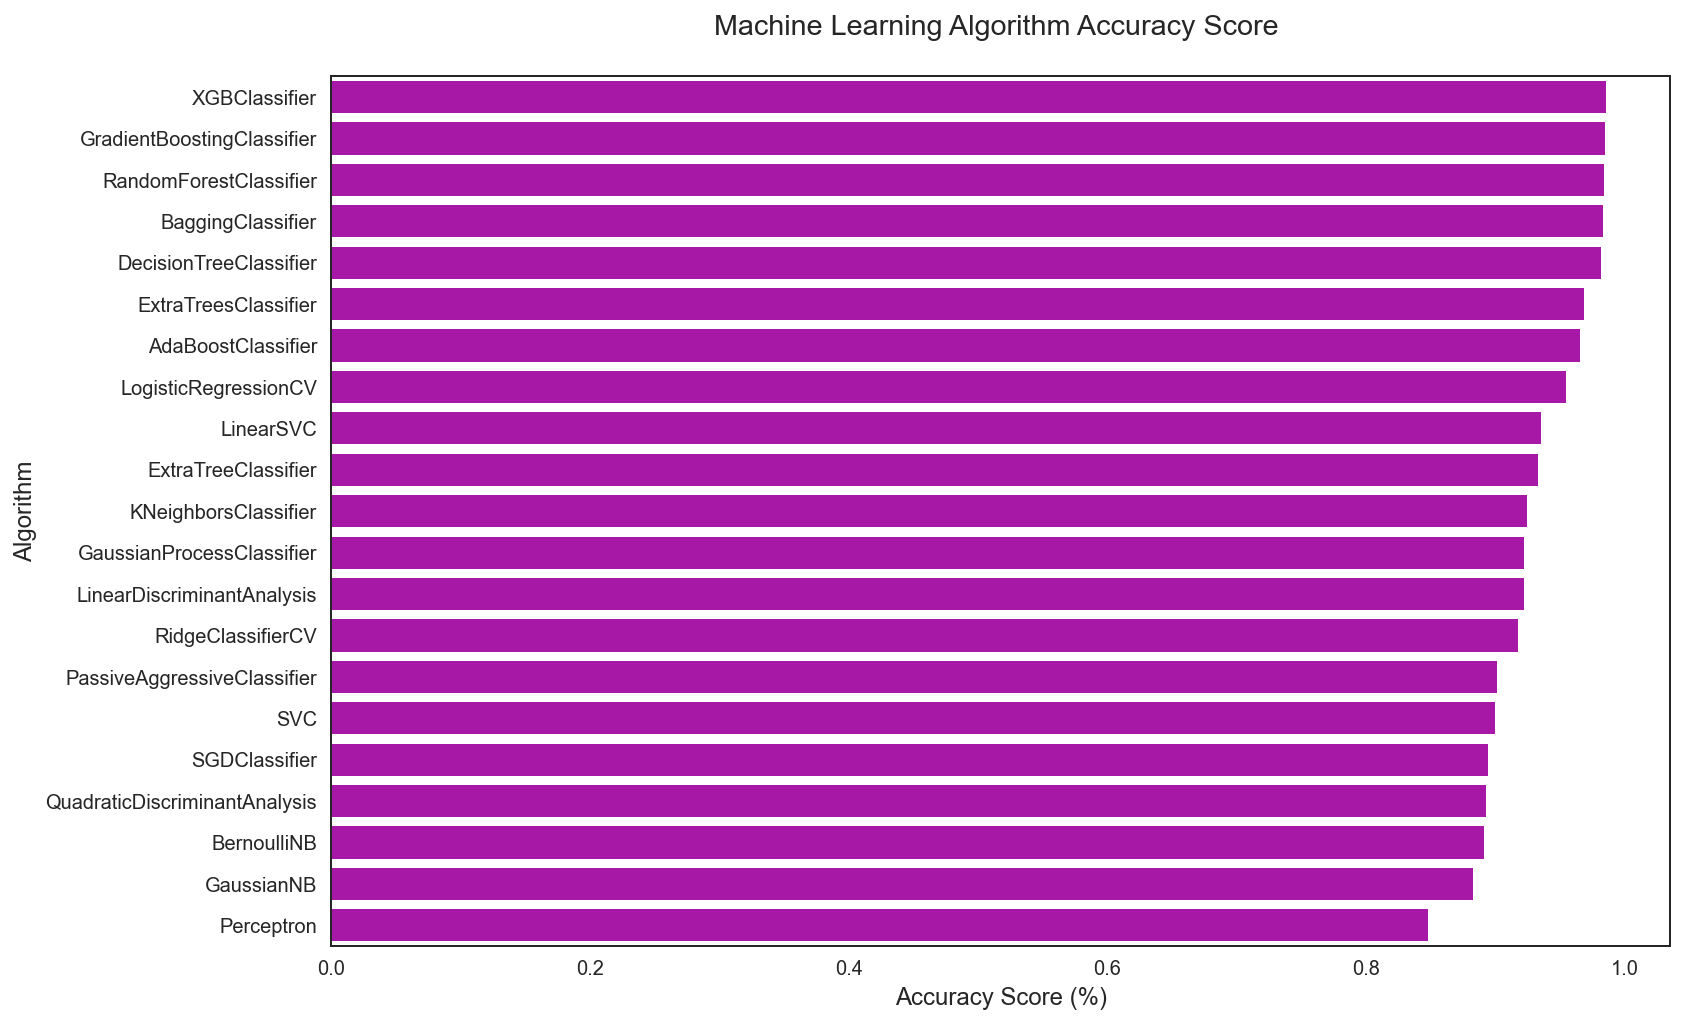

In [27]:
# Show MLA Test Accuracy Mean of above MLA by barplot
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

#### <font color='red'>🠊 As you can see the first 5 models have the very good Test Accuracy Mean and has a small standard deviation.<font>
#### <font color='red'> According to the need, we can use one of them in the product.<font>